#TITANIC Dataset - Exploratory Data Analysis

##Contents:
  * Getting familiar with data - Distributions
  * Handling Missing Values
  * Grouping
  * Feature Engineering
    * Sexes
    * Ages
  * Visualizations
  * Making the data ready for TensorFlow

##About Data:
* Survival :	0 = No, 1 = Yes
* Pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
* Age	: Age in years	
* sibsp	: # of siblings / spouses aboard the Titanic	
* parch	# of parents / children aboard the Titanic	
* ticket	: Ticket number	
* fare :	Passenger fare	
* cabin	: Cabin number	
* embarked	: Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

##Variable Notes
* pclass: A proxy for socio-economic status (SES)
    * 1st = Upper
    * 2nd = Middle
    * 3rd = Lower

* age: Age is fractional if less than 1.
  * If the age is estimated, is it in the form of xx.5

* sibsp: The dataset defines family relations in this way...
  * Sibling = brother, sister, stepbrother, stepsister
  * Spouse = husband, wife (mistresses and fiancés were ignored)

* parch: The dataset defines family relations in this way...
  * Parent = mother, father
  * Child = daughter, son, stepdaughter, stepson
  * Some children travelled only with a nanny, therefore parch=0 for them.

Dataset Source : https://www.kaggle.com/competitions/titanic/data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# !unzip "/content/drive/MyDrive/Titanic/titanic.zip" -d "/content/drive/MyDrive/Titanic/"

In [3]:
train = pd.read_csv("/content/drive/MyDrive/Titanic/train.csv")

In [4]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Number of People:

In [8]:
train.index

RangeIndex(start=0, stop=891, step=1)

891 people

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


Drop Some Unnecessary Columns

In [12]:
train = train.drop("Name", axis=1)
train_noid = train.drop("PassengerId", axis=1)

Mean Values of Each Column:

In [13]:
train.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

#Distributions:

In [14]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [15]:
train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [16]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [17]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

According to Age:

In [18]:
#Children's data
train[train.Age<=8].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


PassengerId    422.888889
Survived         0.666667
Pclass           2.574074
Age              3.355000
SibSp            1.759259
Parch            1.351852
Fare            30.967515
dtype: float64

In [19]:
#Olders' data
train[train.Age>train.Age.mean()].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


PassengerId    464.600000
Survived         0.406061
Pclass           1.948485
Age             41.948485
SibSp            0.339394
Parch            0.357576
Fare            41.079331
dtype: float64

According to sex:

In [20]:
#Women data
train[train.Sex=="female"].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


PassengerId    431.028662
Survived         0.742038
Pclass           2.159236
Age             27.915709
SibSp            0.694268
Parch            0.649682
Fare            44.479818
dtype: float64

According to Fare

In [21]:
train[train.Fare<train.Fare.mean()].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId    443.633824
Survived         0.317647
Pclass           2.594118
Age             28.554143
SibSp            0.363235
Parch            0.285294
Fare            13.752848
dtype: float64

In [22]:
train[train.Fare>train.Fare.mean()].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


PassengerId    453.625592
Survived         0.597156
Pclass           1.388626
Age             33.021421
SibSp            1.037915
Parch            0.691943
Fare            91.668306
dtype: float64

##Some Comparisons:

In [23]:
pd.crosstab(train.Sex, train.Survived)

Survived,0,1
Sex,,
female,81,233
male,468,109


Olders vs Youngers

In [24]:
pd.crosstab(train.Age<train.Age.mean(), train.Survived)
#False:olders, True:youngers.

Survived,0,1
Age,,
False,321,186
True,228,156


riches vs poorers

In [25]:
pd.crosstab(train.Fare>train.Fare.mean(), train.Survived)
#True: riches, false:poorers

Survived,0,1
Fare,,
False,464,216
True,85,126


In [26]:
train.groupby(["Survived"]).mean()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
Survived,,,,,,
0,447.016393,2.531876,30.626179,0.553734,0.329690,22.117887
1,444.368421,1.950292,28.343690,0.473684,0.464912,48.395408


In [27]:
train.groupby([train.Age<train.Age.mean()]).mean()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
Age,,,,,,,
False,454.469428,0.366864,2.175542,41.948485,0.418146,0.295858,34.473857
True,434.817708,0.406250,2.484375,19.172318,0.661458,0.494792,29.207562


## Handling Missing Values

In [28]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

There is no missing value in Survived (which is labels for ML) which is good. Filling others except labels is easier.

In [29]:
#Percentages
train.isna().sum()*(100/len(train))

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

77% of Cabin column is missing. We should drop that column. 

19% of Age column is missing, not deadly for a small project, we can fill it with the average value of the same column. Same as Embarked column too.

In [30]:
train.Age.fillna(train.Age.mean(), inplace=True)
train.Embarked.fillna(train.Embarked.mode(), inplace=True)
train.drop(["Cabin"], axis=1)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [31]:
train.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [32]:
train.drop("Cabin", axis=1, inplace=True)

In [33]:
train.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [34]:
train.Embarked.value_counts() #median=S

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [35]:
index_list = train[train.Embarked.isna()].index
index_list

Int64Index([61, 829], dtype='int64')

In [36]:
for index in index_list:
  train.Embarked[index]="S"

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [37]:
train[train.Embarked.isna()==True]

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


In [38]:
train_noid.head(5)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S


## Grouping

In [39]:
train[["Pclass", "Survived"]].groupby(["Pclass"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [40]:
train[["Fare", "Survived"]].groupby(["Fare"], as_index=False).mean().sort_values(by="Survived", ascending=False)

,Fare,Survived
247,512.3292,1.0
196,57.9792,1.0
89,13.8583,1.0
88,13.7917,1.0
86,13.4167,1.0
...,...,...
103,15.5500,0.0
180,47.1000,0.0
179,46.9000,0.0
178,42.4000,0.0


#Feature Engineering
## Fares

In [41]:
train["Lower-Paid"] = np.zeros(len(train))
train["Middle-Paid"] = np.zeros(len(train))
train["Higher-Paid"] = np.zeros(len(train))
train.head(3)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Lower-Paid,Middle-Paid,Higher-Paid
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,0.0,0.0,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0.0,0.0,0.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0,0.0,0.0


In [42]:
for fare in train.Fare:

  if fare<train.Fare.mean()*0.7:
    index = train[train.Fare==fare].index[0]
    train["Lower-Paid"][index]=1

  elif train.Fare.mean()*0.7 <= fare <= train.Fare.mean()*1.3:
    index = train[train.Fare==fare].index[0]
    train["Middle-Paid"][index]=1

  else:
    index = train[train.Fare==fare].index[0]
    train["Higher-Paid"][index]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [43]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Lower-Paid,Middle-Paid,Higher-Paid
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1.0,0.0,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0.0,0.0,1.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,0.0,0.0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,0.0,0.0,1.0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,1.0,0.0,0.0


## Sexes

In [44]:
train["Male"] = np.zeros(len(train))
train["Female"] = np.zeros(len(train))

for sex in train.Sex:
  if sex=="male":
    male_index_list = train[train.Sex=="male"].index
    for index in male_index_list:
      train["Male"][index] = 1
  else:
    female_index_list = train[train.Sex=="female"].index
    for index in female_index_list:
      train["Female"][index] = 1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [45]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Lower-Paid,Middle-Paid,Higher-Paid,Male,Female
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1.0,0.0,0.0,1.0,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0.0,0.0,1.0,0.0,1.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,0.0,0.0,0.0,1.0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,0.0,0.0,1.0,0.0,1.0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,1.0,0.0,0.0,1.0,0.0


## Ages

In [46]:
train["Youngers"] = np.zeros(len(train))
train["Middle-Aged"] = np.zeros(len(train))
train["Olders"] = np.zeros(len(train))

for age in train.Age:

  if age<train.Age.mean()*0.7:
    index = train[train.Age==age].index[0]
    train["Youngers"][index]=1

  elif train.Age.mean()*0.7 <= age <= train.Age.mean()*1.3:
    index = train[train.Age==age].index[0]
    train["Middle-Aged"][index]=1

  else:
    index = train[train.Age==age].index[0]
    train["Olders"][index]=1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [47]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Lower-Paid,Middle-Paid,Higher-Paid,Male,Female,Youngers,Middle-Aged,Olders
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,4,1,1,female,35.0,1,0,113803,53.1000,S,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5,0,3,male,35.0,0,0,373450,8.0500,S,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


#Visualizations

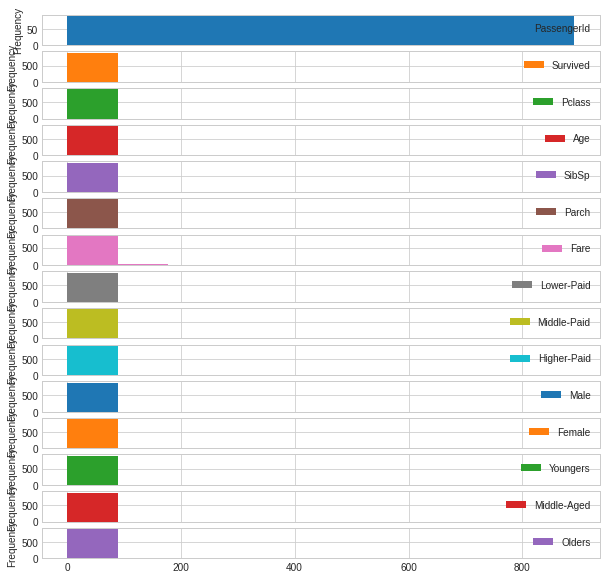

In [67]:
train.plot.hist(figsize=(10,10), subplots=True);

In [49]:
cateogricals = ["Survived", "Pclass", "Sex", "SibSp", "Parch", "Embarked"]
numericals = ["PassengerId", "Age", "Fare"]

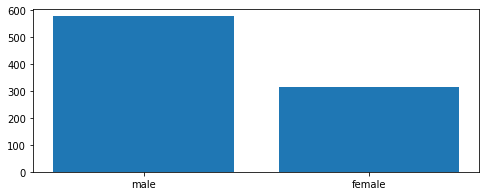

In [50]:
def plot_bar(var, figsize1=(8,3)):
  var = train[var]
  var_num = var.value_counts()
  f, ax = plt.subplots(figsize=figsize1)
  plt.bar(var_num.index, var_num)
  # plt.title(var)
  plt.xticks(var_num.index, var_num.index.values)
  plt.show()

plot_bar("Sex")

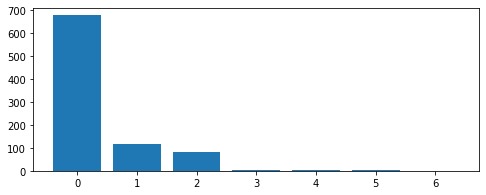

In [51]:
plot_bar("Parch")

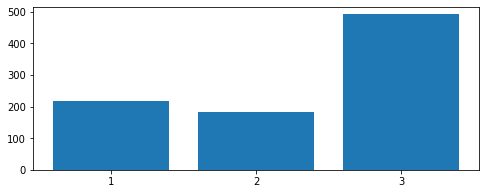

In [52]:
plot_bar("Pclass")

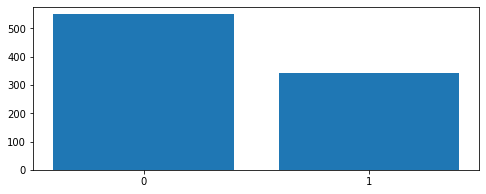

In [53]:
plot_bar("Survived")

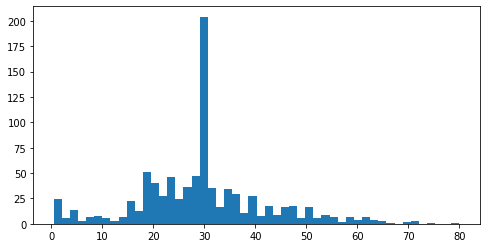

In [54]:
def plot_hist(var, bins1=50, figsize1=(8,4)):
  var = train[var]
  var_num = var.value_counts()
  f, ax = plt.subplots(figsize=figsize1)
  plt.hist(var,bins=bins1)
  # plt.xlabel(var)
  plt.show()

plot_hist("Age")

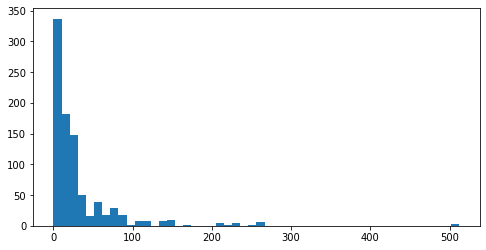

In [55]:
plot_hist("Fare")

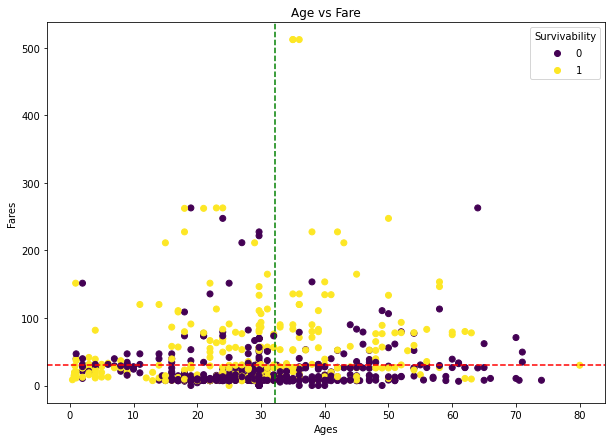

In [56]:
fig, ax = plt.subplots(figsize=(10,7))
graph = ax.scatter(x = train.Age,
                   y = train.Fare,
                   c = train.Survived)
ax.set(title="Age vs Fare", 
       xlabel = "Ages",
       ylabel = "Fares")

ax.legend(*graph.legend_elements(),
          title="Survivability")

ax.axhline(train.Age.mean(), linestyle="--", color="red", label="Average")
ax.axvline(train.Fare.mean(), linestyle="dashed", color="green", label="Average")
plt.show()

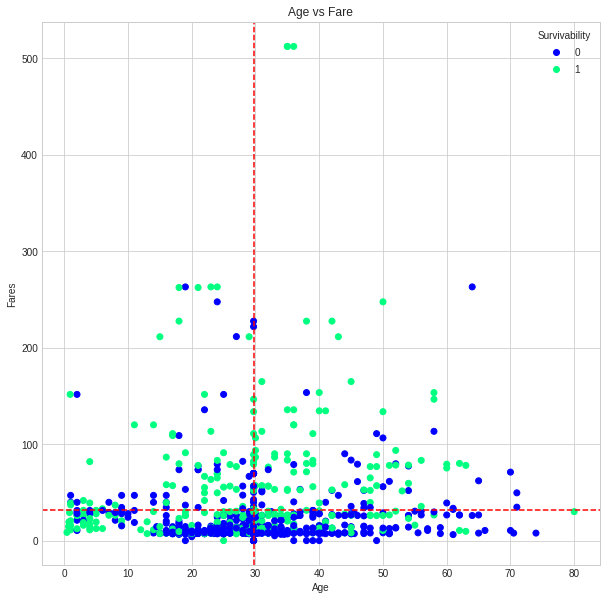

In [57]:
# fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1, figsize=(10,10))
plt.style.use("seaborn-whitegrid")

fig, ax0 = plt.subplots(figsize=(10,10))
graph1 = ax0.scatter(x=train.Age, 
                      y=train.Fare,
                      c = train.Survived,
                     cmap="winter")
ax0.set(title="Age vs Fare", 
        xlabel="Age", 
        ylabel="Fares")
ax0.legend(*graph1.legend_elements(), 
           title="Survivability")
ax0.axhline(train_noid.Fare.mean(), 
            color="r", 
            linestyle="--", 
            label="Average")
ax0.axvline(train.Age.mean(),
            color="r",
            linestyle="--",
            label="Average")


# graph2 = ax1.scatter(x = train_noid.Age,
#                      y = train_noid.Fare,
#                      c = train_noid.Survived)
# ax1.set(xlabel="Ages", ylabel="Fares", title="Ages vs Fares")
# ax1.legend(*graph2.legend_elements(),
#            title="Survivability")
# ax1.axhline(train_noid.Fare.mean(), label="Average", color="red")
# ax1.axvline(train_noid.Age.mean(), label="Average", color="green")
plt.show()

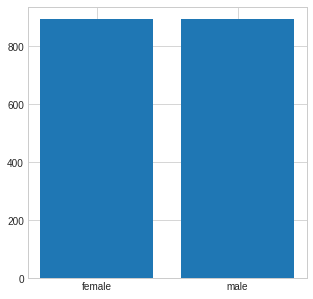

In [58]:
fig, ax = plt.subplots(figsize=(5,5))
sexes = {"female":len(train.Sex=="female"),
         "male":len(train.Sex=="male")}
ax.bar(sexes.keys(), sexes.values());

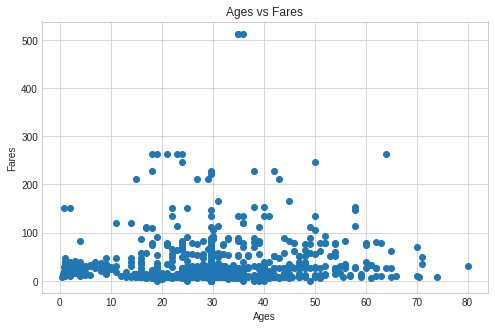

In [59]:
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(train.Age, train.Fare)
ax.set(xlabel="Ages", ylabel="Fares", title="Ages vs Fares");

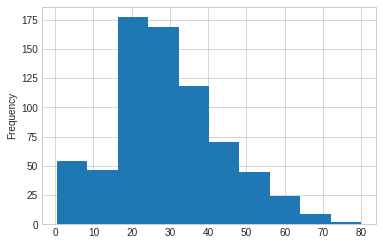

In [60]:
train_noid.Age.plot.hist();

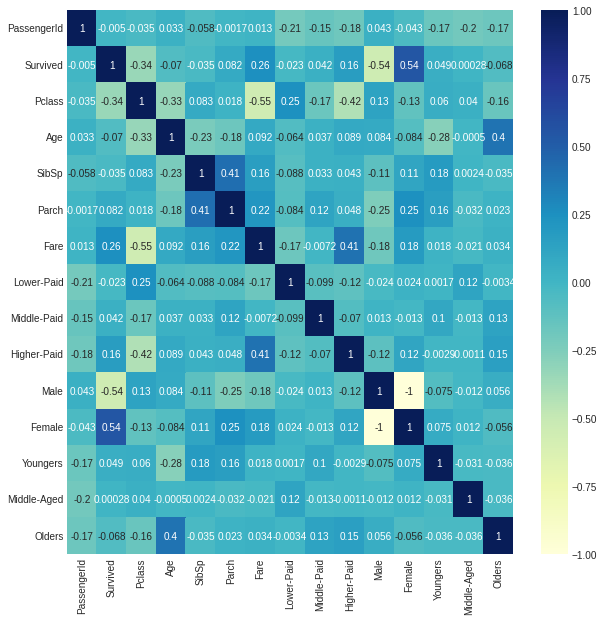

In [61]:
f, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(train.corr(), cmap="YlGnBu", annot=True)

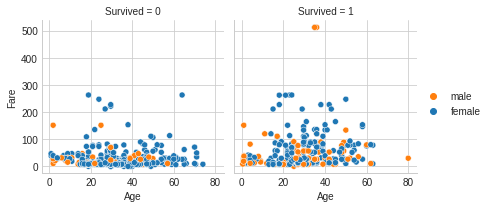

In [62]:
g = sns.FacetGrid(train, col="Survived")
g.map_dataframe(sns.scatterplot, x="Age", y="Fare", hue="Sex")
g.add_legend()
plt.show()

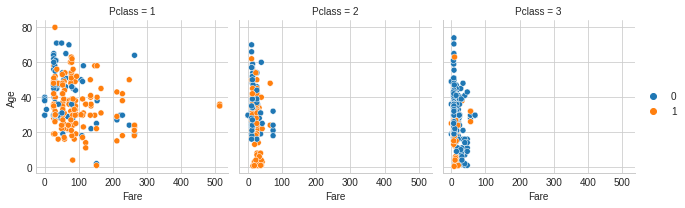

In [63]:
g = sns.FacetGrid(train, col="Pclass")
g.map_dataframe(sns.scatterplot, x="Fare", y="Age", hue="Survived")
g.add_legend()
plt.show()

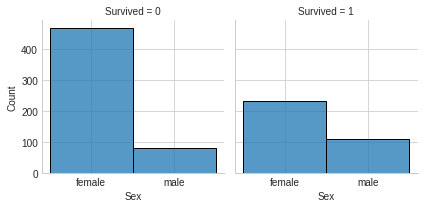

In [64]:
g = sns.FacetGrid(train, col="Survived")
g.map_dataframe(sns.histplot, "Sex");

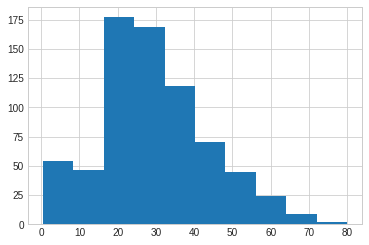

In [65]:
train_noid.Age.hist();

#Making a data ready for TensorFlow:

In [66]:
heatmap_data = train.copy()
heatmap_data = train.drop("Sex", axis=1)
heatmap_data = train.drop("Ticket", axis=1)
pd.get_dummies(heatmap_data["Embarked"], prefix="Embaked")
heatmap_data.drop("Embarked", axis=1, inplace=True)
heatmap_data.drop("Sex", axis=1, inplace=True)
heatmap_data.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Lower-Paid,Middle-Paid,Higher-Paid,Male,Female,Youngers,Middle-Aged,Olders
0,1,0,3,22.0,1,0,7.2500,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,2,1,1,38.0,1,0,71.2833,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3,1,3,26.0,0,0,7.9250,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,4,1,1,35.0,1,0,53.1000,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5,0,3,35.0,0,0,8.0500,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
